In [1]:
# create table tt_q_tag_cnt as 
# select x.id
# 	, to_char(x.creationdate, 'yyyy-mm-dd') as c_date
# 	, (regexp_matches(x.tags, '<(ruby|scala|rust|go|bash|shell|objective-c|python|r|typescript|swift|c#|sql|assembly|kotlin|c\+\+|javascript|vba|c|html|css|java|perl|haskell|julia|php|dart|clojure|f#|elixir|erlang|lisp|groovy|crystal-lang|powershell|cobol|delphi|matlab)>', 'g'))[1] AS matched_tags
# 	, x.tag
#   from (
# 	select id, creationdate, tags, replace(replace(unnest(string_to_array(tags, '><')), '<', ''), '>', '') tag 
#   from posts
# where posttypeid ='1'
#   and (tags like '%<ruby>%' or tags like '%<scala>%' or tags like '%<rust>%' or tags like '%<go>%' or tags like '%<bash>%' or tags like '%<shell>%' or tags like '%<objective-c>%' or tags like '%<python>%' or tags like '%<r>%' or tags like '%<typescript>%' or tags like '%<swift>%' or tags like '%<c#>%' or tags like '%<sql>%' or tags like '%<assembly>%' or tags like '%<kotlin>%' or tags like '%<c++>%' or tags like '%<javascript>%' or tags like '%<vba>%' or tags like '%<c>%' or tags like '%<html>%' or tags like '%<css>%' or tags like '%<java>%' or tags like '%<perl>%' or tags like '%<haskell>%' or tags like '%<julia>%' or tags like '%<php>%' or tags like '%<dart>%' or tags like '%<clojure>%' or tags like '%<f#>%' or tags like '%<elixir>%' or tags like '%<erlang>%' or tags like '%<lisp>%' or tags like '%<groovy>%' or tags like '%<crystal-lang>%' or tags like '%<powershell>%' or tags like '%<cobol>%' or tags like '%<delphi>%' or tags like '%<matlab>%')
#   and creationdate between '2021-11-30' and '2023-12-03' 
#   ) x 
# ;

In [ ]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
ppp = os.path.abspath('../../visualization')

sys.path.insert(1, p)
sys.path.insert(1, pp)
sys.path.insert(1, ppp)




In [3]:
import json
import pandas as pd
import numpy as np
from utils.salary import *
import psycopg2
from utils.statistics import *
import config.config as conf
import datetime
import re
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colors = plt.get_cmap('tab20').colors 

In [4]:
from matplotlib import font_manager
import matplotlib as mpl
from matplotlib import font_manager as fm

# ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Ïù¥Î¶ÑÍ≥º Í≤ΩÎ°ú ÌôïÏù∏
for font in font_manager.fontManager.ttflist:
    if 'Helvetica' in font.name: # 'Nanum' ÎåÄÏã† ÏõêÌïòÎäî Í∏ÄÍº¥Ïùò ÏùºÎ∂ÄÎ•º ÏûÖÎ†•ÌïòÏó¨ Í≤ÄÏÉâÌï† Ïàò ÏûàÏäµÎãàÎã§.
        print(font.name, font.fname)

# ÏßÅÏ†ë Í≤ΩÎ°úÎ°ú Helvetica Ìè∞Ìä∏ Î∂àÎü¨Ïò§Í∏∞
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print(f"Registered font name: {font_name}")

mpl.rcParams['font.family'] = font_name


Helvetica /System/Library/Fonts/Helvetica.ttc
Helvetica Neue /System/Library/Fonts/HelveticaNeue.ttc
Registered font name: Helvetica


## Îç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨

In [5]:
output_dir = './fig/'
by = 'rel_week'

In [6]:
# test.json ÎÇ¥Ïö©: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json('../../visualization/result/tag/salary.json') ## pd.read_json Ïù¥Ïö©

In [7]:
df = df.reset_index().rename(columns={'index':'year'})

In [8]:
df = df.sort_values(by = 'year').reset_index(drop=True)

In [9]:
df

year   clojure       f#   elixir    erlang     perl   ruby  scala   rust  \
0  2019   90000.0  80000.0  76000.0   71000.0      NaN  75000  78000  72000   
1  2020       NaN      NaN      NaN       NaN  76000.0  71000  76000  74000   
2  2021   95000.0  81037.0  80077.0   80077.0  80000.0  80000  77832  77530   
3  2022  106644.0  95526.0  92959.0  103000.0  90073.0  93000  92780  87047   
4  2023   96381.0  99311.0  96381.0   99492.0  94540.0  98522  96381  87012   
5  2024   95541.0  80555.0  96000.0  100636.0  90000.0  90221  88619  76292   

      go  ...       zig     apex  nim-lang     raku      ada   prolog  \
0  80000  ...       NaN      NaN       NaN      NaN      NaN      NaN   
1  74000  ...       NaN      NaN       NaN      NaN      NaN      NaN   
2  75669  ...       NaN      NaN       NaN      NaN      NaN      NaN   
3  89204  ...       NaN      NaN       NaN      NaN      NaN      NaN   
4  92760  ...  103611.0  81552.0   80000.0  79448.0  71500.0  70000.0   
5  76433  ...   75332.0  82500.0   94924.0      NaN  42584.0  43327.0   

   gdscript   vb.net  micropython  zephyr-rtos  
0       NaN      NaN          NaN          NaN  
1       NaN      NaN          NaN          NaN  
2       NaN      NaN          NaN          NaN  
3       NaN      NaN          NaN          NaN  
4   69608.0  65000.0          NaN          NaN  
5   60684.0  63694.0      75184.0      64444.0  

[6 rows x 54 columns]

In [10]:
def get_CID_ratio_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df['salary_ratio'] = filtered_df.groupby(['lang'])['salary'].transform(lambda x: x/x.shift(1) )
    filtered_df = filtered_df.dropna()

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary_ratio'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [11]:
def get_CID_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [12]:
def get_CID_log_df(df, year) : 
    year_list = [year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()
    df_salary['salary'] = np.log(df_salary['salary'])

    filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)].copy()
    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)

    filtered_df.loc[ : , 'CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['CID'].diff()
    filtered_df = filtered_df.dropna().reset_index(drop=True)


    return filtered_df




In [13]:
def get_CID_ratio_rel_df(df, year) : 
    year_list = [year-3, year-2, year-1, year]
    print(year_list)
    df = df = df[df['year'].isin(year_list)]
    df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')
    df_salary = df_salary.dropna()

    valid_langs = df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index
    filtered_df = df_salary[df_salary['lang'].isin(valid_langs)].copy()

    # Ïñ∏Ïñ¥Î≥ÑÎ°ú Ïó∞ÎèÑ Ï†ïÎ†¨ ÌõÑ ÏÉÅÎåÄ Î≥ÄÌôîÏú®(ÏÑ±Ïû•Î•†) Í≥ÑÏÇ∞
    filtered_df.sort_values(by=['lang', 'year'], inplace=True)
    filtered_df['growth_rate'] = filtered_df.groupby('lang')['salary'].pct_change()

    # growth_rateÏùò Ïù¥Ï∞® Ï∞®Î∂Ñ = CID Í≥ÑÏÇ∞
    filtered_df['CID'] = filtered_df.groupby('lang')['growth_rate'].diff()
    filtered_df['CID'] = filtered_df.groupby('lang')['CID'].diff()

    # ÏµúÏ¢Ö Ï†ïÎ¶¨: CID Í≥ÑÏÇ∞Ïù¥ Í∞ÄÎä•Ìïú Ïó∞ÎèÑÎßå ÎÇ®ÍπÄ
    filtered_df = filtered_df.dropna(subset=['growth_rate', 'CID']).reset_index(drop=True)


    return filtered_df




In [14]:
def filter_df( df, type ) :
    tot_filtered_df = pd.DataFrame()
    for year in [ 2022, 2023, 2024] : 
        if type == 'ratio' : 
            filtered_df = get_CID_ratio_df(df, year)
        elif type == 'log' : 
            filtered_df = get_CID_log_df(df, year)
        elif type == 'ratio_rel' :
            filtered_df = get_CID_ratio_rel_df(df, year)
            
        else :
            filtered_df = get_CID_df(df, year)
            
        tot_filtered_df = pd.concat([tot_filtered_df, filtered_df], axis = 0)
    
        tot_exist_df = tot_filtered_df[tot_filtered_df['lang'].isin(tot_filtered_df['lang'].value_counts()[lambda x: x == len([ 2022, 2023, 2024])].index)].copy()
        tot_exist_df=  tot_exist_df.sort_values(by = ['year', 'CID'], ascending=[False, True])
    return tot_exist_df

In [15]:
tot_df_r = filter_df(df, 'ratio')
tot_df_log = filter_df(df, 'log')
tot_df_nr = filter_df(df, 'notratio')
tot_df_rl = filter_df(df, 'ratio_rel')

[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2020, 2021, 2022]
[2021, 2022, 2023]
[2022, 2023, 2024]
[2019, 2020, 2021, 2022]
[2020, 2021, 2022, 2023]
[2021, 2022, 2023, 2024]


In [16]:
cid_2024_lang = tot_df_rl[tot_df_rl['year'] == 2024].sort_values(by = ['CID'], ascending=[False])

In [17]:
cid_2024_df = tot_df_rl[tot_df_rl['lang'].isin(cid_2024_lang['lang'].values)]

In [18]:
cid_2024_df.head()
cid_2024 = cid_2024_df[cid_2024_df['year'] == 2024].sort_values(by = ['CID'], ascending=[False])

In [19]:
cid_2024

year         lang   salary  growth_rate       CID
0   2024     assembly  60834.0    -0.210051  0.094774
31  2024        scala  88619.0    -0.080535  0.033896
35  2024          vba  64444.0    -0.019087  0.030750
30  2024         rust  76292.0    -0.123201  0.000355
33  2024        swift  75184.0    -0.134792 -0.017633
29  2024         ruby  90221.0    -0.084255 -0.040508
23  2024  objective-c  73648.0    -0.181689 -0.063818
32  2024          sql  64919.0    -0.133986 -0.074364
1   2024   bash/shell  75184.0    -0.122420 -0.075784
13  2024           go  76433.0    -0.176013 -0.076870
3   2024           c#  66066.0    -0.118685 -0.084402
4   2024          c++  64444.0    -0.140323 -0.086999
2   2024            c  63694.0    -0.143334 -0.093347
16  2024     html/css  61485.0    -0.123496 -0.108468
27  2024       python  67723.0    -0.135425 -0.142707
34  2024   typescript  65907.0    -0.145219 -0.151883
20  2024       kotlin  65815.0    -0.158451 -0.156219
17  2024         java  61714.0    -0.151126 -0.158457
18  2024   javascript  63694.0    -0.139666 -0.184145
28  2024            r  64444.0    -0.140323 -0.214508

## Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [20]:
# conn = psycopg2.connect(host = conf.database_user['host'], dbname=conf.database_user['dbname'], user=conf.database_user['user'], password=conf.database_user['password'])
# try:
#     cur = conn.cursor()
#     cur.execute("\
# select c_date, matched_tags, tag, count(*) as cnt \
#   from tt_q_tag_cnt \
#  group by c_date, matched_tags, tag \
# ; \
#                 " 
#    )
#     rows = cur.fetchall()
    

# except psycopg2.DatabaseError as db_err:
#     print(db_err)
# finally : 
#   cur.close()

In [21]:
# conn = psycopg2.connect(host = conf.database_user['host'], dbname=conf.database_user['dbname'], user=conf.database_user['user'], password=conf.database_user['password'])
# try:
#     cur = conn.cursor()
#     cur.execute("\
# select c_date, matched_tags, tag, sum(prop_for_t) as cnt \
#   from tt_q_tag_cnt_02 \
#  group by c_date, matched_tags, tag \
# ; \
#                 " 
#    )
#     rows = cur.fetchall()
    

# except psycopg2.DatabaseError as db_err:
#     print(db_err)
# finally : 
#   cur.close()

In [22]:
str([x for x in cid_2024['lang']])[1:-1]

"'assembly', 'scala', 'vba', 'rust', 'swift', 'ruby', 'objective-c', 'sql', 'bash/shell', 'go', 'c#', 'c++', 'c', 'html/css', 'python', 'typescript', 'kotlin', 'java', 'javascript', 'r'"

In [23]:
q_string =  f"select c_date, matched_tags, tag, sum(prop_for_t) as cnt from tt_q_tag_cnt_02 where matched_tags in ({str([x for x in cid_2024['lang']])[1:-1]}) group by c_date, matched_tags, tag; "


In [24]:
q_string

"select c_date, matched_tags, tag, sum(prop_for_t) as cnt from tt_q_tag_cnt_02 where matched_tags in ('assembly', 'scala', 'vba', 'rust', 'swift', 'ruby', 'objective-c', 'sql', 'bash/shell', 'go', 'c#', 'c++', 'c', 'html/css', 'python', 'typescript', 'kotlin', 'java', 'javascript', 'r') group by c_date, matched_tags, tag; "

In [25]:
# CIDÎ•º Îã§Ïãú Í≥ÑÏÇ∞Ìï®Ïóê Îî∞Îùº ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† Ïñ∏Ïñ¥ Î≥ÄÍ≤Ω(2020ÎÖÑÎ∂ÄÌÑ∞ 2024ÎÖÑÍπåÏßÄ Î™®Îì† SALARY Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÎäî Ïñ∏Ïñ¥Î•º ÎåÄÏÉÅÏúºÎ°ú )
conn = psycopg2.connect(host = conf.database_user['host'], dbname=conf.database_user['dbname'], user=conf.database_user['user'], password=conf.database_user['password'])
try:
    cur = conn.cursor()
    cur.execute(q_string)
    rows = cur.fetchall()
    

except psycopg2.DatabaseError as db_err:
    print(db_err)
finally : 
  cur.close()

In [26]:
tag_dis_df = pd.DataFrame(rows, columns = [
  'cdate' 
, 'matched_tags' 
, 'tag'
, 'cnt'
])

In [27]:
tag_dis_df.head()

cdate matched_tags               tag                     cnt
0  2021-01-01     assembly               arm  0.50000000000000000000
1  2021-01-01     assembly          assembly  3.84999999999999999999
2  2021-01-01     assembly                 c  0.78333333333333333333
3  2021-01-01     assembly  cpu-architecture  0.20000000000000000000
4  2021-01-01     assembly     cpu-registers  0.20000000000000000000

In [28]:
std_date = datetime.datetime(2022, 11, 30)

In [29]:
tag_dis_df['cdate'] = pd.to_datetime(tag_dis_df['cdate'], format="%Y-%m-%d")
tag_dis_df['rel_day'] = (tag_dis_df['cdate'] - std_date).dt.days
tag_dis_df['rel_week'] = np.floor(tag_dis_df['rel_day']/7)

In [30]:
tag_dis_df = tag_dis_df[(tag_dis_df['rel_week']>-53 ) & (tag_dis_df['rel_week']<=52 )]

In [31]:
tot_df = tag_dis_df.groupby([by, 'matched_tags'])['cnt'].sum().reset_index(name='tot_cnt')

In [32]:
tag_dis_by_df = tag_dis_df.groupby([by, 'matched_tags', 'tag'])['cnt'].sum().reset_index(name = 'cnt')

In [33]:
tag_dis_by_df.head()

rel_week matched_tags              tag                     cnt
0     -52.0     assembly             6502  0.25000000000000000000
1     -52.0     assembly            68000  0.25000000000000000000
2     -52.0     assembly            8-bit  0.25000000000000000000
3     -52.0     assembly             8051  0.25000000000000000000
4     -52.0     assembly  addressing-mode  0.53333333333333333333

In [34]:
df_proportion = pd.merge(tag_dis_by_df, tot_df, on = [by, 'matched_tags'], how = 'left')
df_proportion['proportion'] = df_proportion['cnt'] / df_proportion['tot_cnt']
# .reset_index(name='count')

In [35]:
df_proportion.tail()

rel_week matched_tags        tag                      cnt  \
960465      52.0          vba     vb.net   0.33333333333333333333   
960466      52.0          vba        vba  40.06666666666666666658   
960467      52.0          vba    windows   0.91666666666666666666   
960468      52.0          vba  worksheet   0.33333333333333333333   
960469      52.0          vba     x-axis   0.20000000000000000000   

                        tot_cnt                        proportion  
960465  97.99999999999999999974  0.003401360544217687074804942385  
960466  97.99999999999999999974    0.4088435374149659863947581563  
960467  97.99999999999999999974  0.009353741496598639455739101763  
960468  97.99999999999999999974  0.003401360544217687074804942385  
960469  97.99999999999999999974  0.002040816326530612244903373594

In [36]:
df_proportion['proportion'] = df_proportion['proportion'].astype(float)
df_proportion['tot_cnt'] = df_proportion['tot_cnt'].astype(float)

In [37]:
df_entropy = df_proportion.groupby([by, 'matched_tags'])['proportion'].apply(lambda x : calculate_entropy(x)).to_frame(name='entropy').reset_index()

In [38]:
df_entropy_viz = pd.merge(df_entropy, df_proportion[[by, 'matched_tags', 'tot_cnt']].drop_duplicates(), \
                           on = [by, 'matched_tags'], how = 'left')

In [39]:
df_proportion

rel_week matched_tags              tag                      cnt  \
0          -52.0     assembly             6502   0.25000000000000000000   
1          -52.0     assembly            68000   0.25000000000000000000   
2          -52.0     assembly            8-bit   0.25000000000000000000   
3          -52.0     assembly             8051   0.25000000000000000000   
4          -52.0     assembly  addressing-mode   0.53333333333333333333   
...          ...          ...              ...                      ...   
960465      52.0          vba           vb.net   0.33333333333333333333   
960466      52.0          vba              vba  40.06666666666666666658   
960467      52.0          vba          windows   0.91666666666666666666   
960468      52.0          vba        worksheet   0.33333333333333333333   
960469      52.0          vba           x-axis   0.20000000000000000000   

        tot_cnt  proportion  
0          66.0    0.003788  
1          66.0    0.003788  
2          66.0    0.003788  
3          66.0    0.003788  
4          66.0    0.008081  
...         ...         ...  
960465     98.0    0.003401  
960466     98.0    0.408844  
960467     98.0    0.009354  
960468     98.0    0.003401  
960469     98.0    0.002041  

[960470 rows x 6 columns]

In [40]:
df_entropy_viz['log_tot_cnt'] = np.log(df_entropy_viz['tot_cnt'])

In [41]:
cid_2024.shape

(20, 5)

In [42]:
lang_t5_2024 = list(cid_2024['lang'])[:5]
lang_b5_2024 = list(cid_2024['lang'])[-5:]

In [43]:
# lang_t5_2024.append('python')
# # lang_b5_2024.append('python')

In [44]:
df_entropy_viz_bf = df_entropy_viz[df_entropy_viz[by]<0]
df_entropy_viz_af = df_entropy_viz[df_entropy_viz[by]>=0]

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

def analyze_entropy_change(data, measure='entropy'):
    results = []

    languages = data['matched_tags'].unique()

    for lang in languages:
        df_lang = data[data['matched_tags'] == lang]
        before = df_lang[df_lang['rel_week'] < 0]['entropy']
        after  = df_lang[df_lang['rel_week'] >= 0]['entropy']
        

        if len(before) < 5 or len(after) < 5:
            continue  # ÏÉòÌîå ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Ïä§ÌÇµ

        # ÌèâÍ∑†
        mean_before = before.mean()
        mean_after = after.mean()
        diff = mean_after - mean_before

        # ÌëúÏ§ÄÏò§Ï∞® (SE)ÏôÄ 95% Ïã†Î¢∞Íµ¨Í∞Ñ
        pooled_se = np.sqrt(before.var(ddof=1)/len(before) + after.var(ddof=1)/len(after))
        ci_low = diff - 1.96 * pooled_se
        ci_high = diff + 1.96 * pooled_se

        pval = mannwhitneyu(before, after, alternative='two-sided').pvalue

        results.append({
            'Language': lang,
            'Mean_Before': mean_before,
            'Mean_After': mean_after,
            'Diff': diff,
            'CI_Low': ci_low,
            'CI_High': ci_high,
            'pvalue': pval
        })

    summary_df = pd.DataFrame(results)
    return summary_df

In [46]:
marker_label = {
    "High": "^",    # Ïõê
    "Mid": "s",     # ÏÇ¨Í∞ÅÌòï
    "Low": "o"      # ÏÇºÍ∞ÅÌòï
}

color_label = {
    "High": "#e31a1c",
    "Mid": "#333333",
    "Low": "#1f78b4"
}


In [47]:
import matplotlib.pyplot as plt

def plot_forest_with_significance(summary_df):
    summary_df = summary_df.sort_values('Diff')
    languages = summary_df['Language']
    diffs = summary_df['Diff'].values
    ci_lows = diffs - summary_df['CI_Low'].values
    ci_highs = summary_df['CI_High'].values - diffs
    p_values = summary_df['pvalue'].values

    # fig, ax = plt.subplots(figsize=(12, max(6, len(languages) * 0.45)), constrained_layout=True)
    fig, ax = plt.subplots(figsize=(9, max(6, len(languages) * 0.45)), constrained_layout=True)

        # Î≥ÑÌëú Ï∂îÍ∞Ä
    significance = []
    for p in p_values:
        if p < 0.05:
            significance.append('*')
        else:
            significance.append('')

    labels = [f"{lang} ({sig})" if sig else lang for lang, sig in zip(languages, significance)]

    color_map = {}
    marker_map = {}
    for label in labels:
        original_text = label
        clean_text = original_text.replace('*', '').replace('(', '').replace(')', '').replace(' ', '')  # "python" ÏúºÎ°ú ÎπÑÍµê
        if clean_text in lang_t5_2024:
            color_map[label]  = color_label['High']  # Í∞ïÏ°∞Ìï† Ïñ∏Ïñ¥Îäî Îπ®Í∞ÑÏÉâ
            marker_map[label] = marker_label['High']  # Í∞ïÏ°∞Ìï† Ïñ∏Ïñ¥Îäî Îπ®Í∞ÑÏÉâ
        elif clean_text in lang_b5_2024:
            color_map[label]  = color_label['Low'] 
            marker_map[label] = marker_label['Low']
        else:
            color_map[label]  = color_label['Mid'] 
            marker_map[label] = marker_label['Mid']

    # Îç∞Ïù¥ÌÑ∞ Î£®ÌîÑ
    for diff, label, ci_low, ci_high in zip(diffs, labels, ci_lows, ci_highs):
        c = color_map.get(label, "#333333")  # Îß§Ìïë ÏóÜÏúºÎ©¥ Í∏∞Î≥∏ÏùÄ Í≤ÄÏ†ï
        err = np.array([[ci_low], [ci_high]])
        ax.errorbar(
            diff, label,
            xerr=err,
            # fmt='o',
            color=c,
            ecolor=c,
            elinewidth=2,
            capsize=4,
            fmt=marker_map.get(label, 'o'),  # Îß§Ìïë ÏóÜÏúºÎ©¥ Í∏∞Î≥∏ÏùÄ ÏõêÌòï
            markersize=10
        )
        

    
    # ax.errorbar(diffs, labels, xerr=errors, fmt='o', color='#333333', ecolor='#333333', elinewidth=2, capsize=4)
    ax.axvline(0, color='black', linestyle='-')
    # ax.set_title('Language-wise Entropy Change')
    ax.set_xlabel('Change in Entropy(95% CI)', fontsize=20)
    ax.grid(True, axis='x')

    plt.tick_params(axis='x', labelsize=16)
    plt.tick_params(axis='y', labelsize=16)

    for label in ax.get_yticklabels():
        original_text = label.get_text()        # Ïòà: "python***"
        label.set_color(color_map[original_text])  # Í∞ïÏ°∞Ìï† Ïñ∏Ïñ¥Îäî Îπ®Í∞ÑÏÉâ

    handles = [
    Line2D([0], [0], marker=marker_label["Low"],  color=color_label["Low"],  linestyle="",
        markersize=7, label="Low CID"),
    Line2D([0], [0], marker=marker_label["Mid"],  color=color_label["Mid"],  linestyle="",
        markersize=7, label="Mid CID"),
    Line2D([0], [0], marker=marker_label["High"], color=color_label["High"], linestyle="",
        markersize=7, label="High CID")
    ]
    fig.legend(
        handles=handles,
        # labels=labels,
        loc = 'lower center',
        bbox_to_anchor=(0.5, -0.1),   # Ï∫îÎ≤ÑÏä§ Î∞ñÏúºÎ°ú ÏÇ¥Ïßù ÎÇ¥Î¶¨Í∏∞
        frameon=False, 
        ncol=3,
        fontsize=20,
        # handler_map={Line2D: HandlerLine2D(numpoints=1)},  # ÎßàÏª§ 1Í∞úÎßå ÏùºÍ¥ÄÎêòÍ≤å
        # handlelength=1.0, handleheight=1.0,  # ÎßàÏª§ ÏÉÅÏûê ÌÅ¨Í∏∞ ÌÜµÏùº
        # handletextpad=0.6, columnspacing=2.0, labelspacing=0.8,
        # borderaxespad=0.0
    )
    plt.savefig(f"{output_dir}Result_Fig13.png", dpi=300, bbox_inches='tight')
    plt.show()


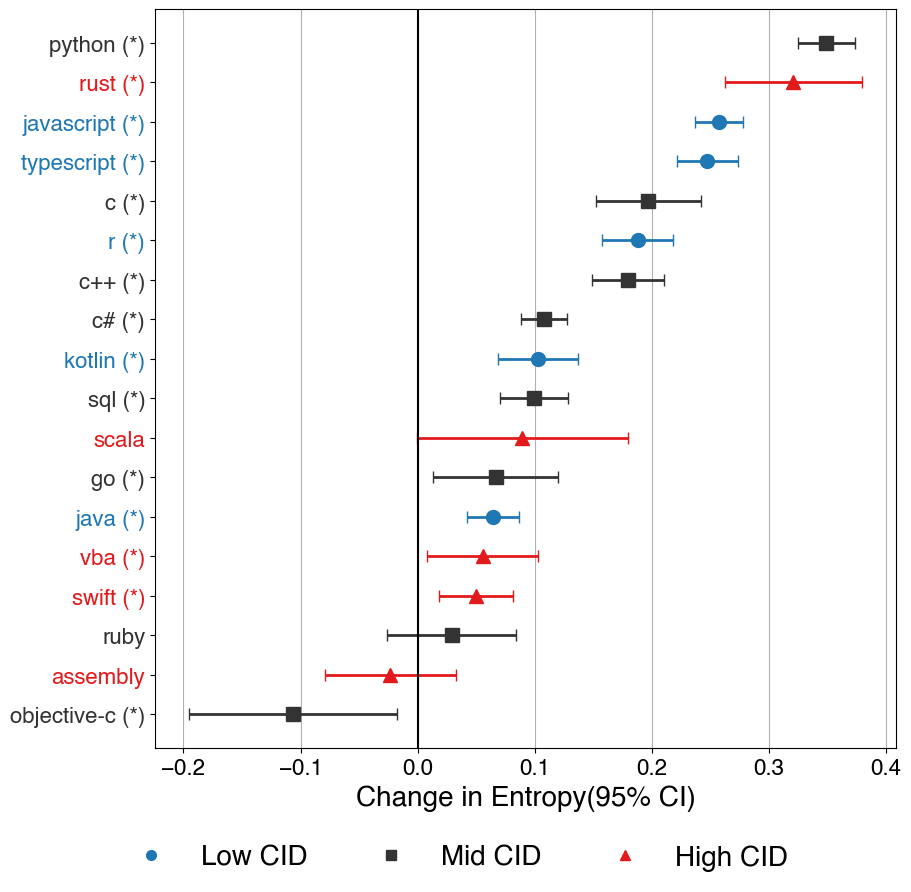

Language  Mean_Before  Mean_After      Diff    CI_Low   CI_High  \
0      assembly     3.399796    3.376487 -0.023309 -0.079151  0.032534   
1             c     3.853464    4.050379  0.196914  0.152287  0.241541   
2            c#     4.354199    4.461986  0.107786  0.087911  0.127662   
3           c++     4.216737    4.396075  0.179338  0.148693  0.209984   
4            go     3.478390    3.544969  0.066580  0.013323  0.119837   
5          java     4.606085    4.670533  0.064448  0.042130  0.086765   
6    javascript     4.119059    4.376109  0.257050  0.236748  0.277352   
7        kotlin     3.523366    3.626088  0.102722  0.068649  0.136796   
8   objective-c     2.721702    2.614971 -0.106730 -0.195422 -0.018038   
9        python     4.455453    4.804284  0.348831  0.324344  0.373319   
10            r     3.680124    3.868139  0.188015  0.157635  0.218394   
11         ruby     3.051632    3.080593  0.028961 -0.026143  0.084064   
12         rust     2.845173    3.165921  0.320749  0.262018  0.379479   
13        scala     3.093773    3.183177  0.089404 -0.000517  0.179326   
14          sql     3.459585    3.559009  0.099424  0.070422  0.128426   
15        swift     3.566739    3.616693  0.049954  0.018115  0.081792   
16   typescript     3.467168    3.714492  0.247324  0.221337  0.273311   
17          vba     2.485602    2.541039  0.055437  0.007702  0.103172   

          pvalue  
0   2.773264e-01  
1   1.168540e-11  
2   4.450096e-15  
3   1.225379e-14  
4   2.050944e-02  
5   3.889071e-08  
6   1.060355e-18  
7   7.429893e-08  
8   3.996394e-02  
9   1.060355e-18  
10  2.806213e-15  
11  3.993411e-01  
12  4.928058e-15  
13  1.141419e-01  
14  1.384688e-08  
15  1.820614e-03  
16  1.772843e-18  
17  2.593608e-02

In [48]:
# (1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# dataÏóêÎäî 'matched_tags' (Ïñ∏Ïñ¥Î™Ö), 'period' (before/after), 'entropy' Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº Ìï¥

# (2) Î∂ÑÏÑù
summary_df = analyze_entropy_change(df_entropy_viz, measure='entropy')

plot_forest_with_significance(summary_df)

# (4) Summary ÌÖåÏù¥Î∏îÎèÑ ÌôïÏù∏ Í∞ÄÎä•
display(summary_df)


In [49]:
summary_df = summary_df.sort_values('Diff')
top_summary_df = summary_df[summary_df['Language'].isin(lang_t5_2024)]
bot_summary_df = summary_df[summary_df['Language'].isin(lang_b5_2024)]
mid_summary_df = summary_df[~(summary_df['Language'].isin(lang_t5_2024)) & ~(summary_df['Language'].isin(lang_b5_2024))]

In [50]:
summary_dict = dict()
summary_dict['High'] = top_summary_df
summary_dict['Mid'] = mid_summary_df
summary_dict['Low'] = bot_summary_df

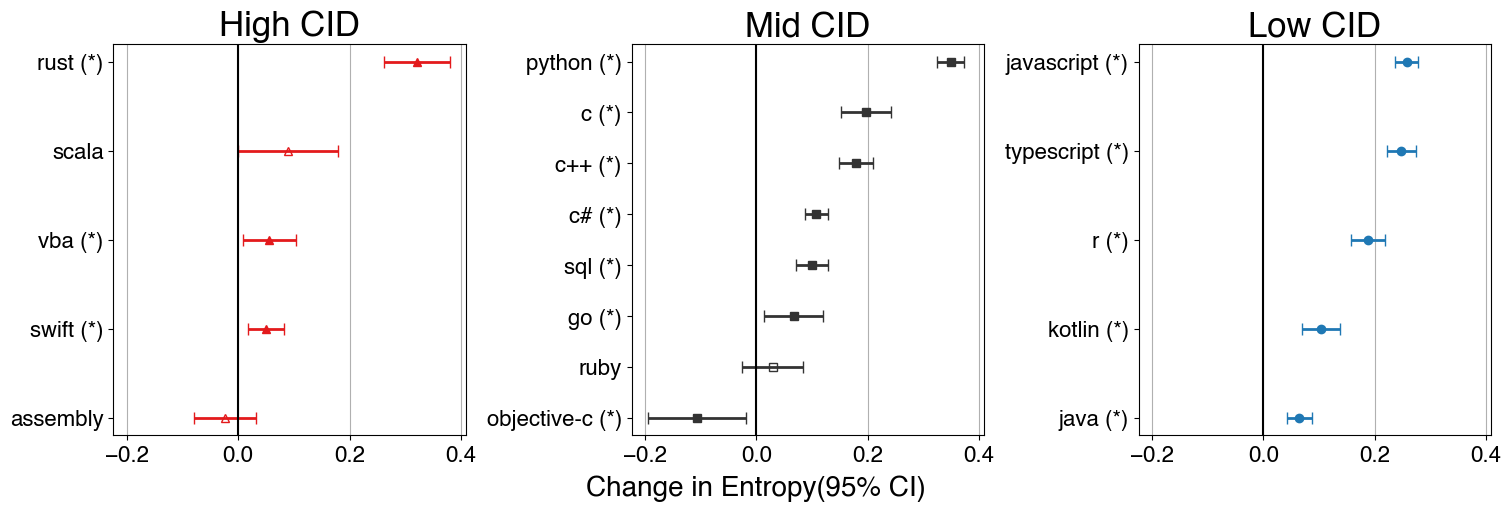

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharex=True)

for i, key in enumerate(summary_dict.keys()):
    s_df        = summary_dict[key]
    languages   = s_df['Language']
    diffs       = s_df['Diff'].values
    ci_lows     = diffs - s_df['CI_Low'].values
    ci_highs    = s_df['CI_High'].values - diffs
    p_values    = s_df['pvalue'].values


    significance = []
    for p in p_values:
        if p < 0.05:
            significance.append('*')
        else:
            significance.append('')

    labels = [f"{lang} ({sig})" if sig else lang for lang, sig in zip(languages, significance)]

    for diff, ci_low, ci_high, label, si in zip(diffs , ci_lows, ci_highs, labels, significance):
        err = np.array([[ci_low], [ci_high]])
        axs[i].errorbar(
            diff, label,
            xerr=err,
            fmt=marker_label[key],
            mfc=color_label[key] if si == '*' else 'none', 
            color= color_label[key],
            ecolor=color_label[key],
            elinewidth=2,
            capsize=4,
            markersize=6
        )
    # ax.errorbar(diffs, labels, xerr=errors, fmt='o', color='#333333', ecolor='#333333', elinewidth=2, capsize=4)
    axs[i].set_title(f"{key} CID", fontsize=25)
    axs[i].axvline(0, color='black', linestyle='-')
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].grid(True, axis='x')
    fig.supxlabel('Change in Entropy(95% CI)', fontsize=20)
plt.savefig(f"{output_dir}Result_Fig13_1.png", dpi=300, bbox_inches='tight')
plt.show()
    


In [52]:
summary_dict

{'High':     Language  Mean_Before  Mean_After      Diff    CI_Low   CI_High  \
 0   assembly     3.399796    3.376487 -0.023309 -0.079151  0.032534   
 15     swift     3.566739    3.616693  0.049954  0.018115  0.081792   
 17       vba     2.485602    2.541039  0.055437  0.007702  0.103172   
 13     scala     3.093773    3.183177  0.089404 -0.000517  0.179326   
 12      rust     2.845173    3.165921  0.320749  0.262018  0.379479   
 
           pvalue  
 0   2.773264e-01  
 15  1.820614e-03  
 17  2.593608e-02  
 13  1.141419e-01  
 12  4.928058e-15  ,
 'Mid':        Language  Mean_Before  Mean_After      Diff    CI_Low   CI_High  \
 8   objective-c     2.721702    2.614971 -0.106730 -0.195422 -0.018038   
 11         ruby     3.051632    3.080593  0.028961 -0.026143  0.084064   
 4            go     3.478390    3.544969  0.066580  0.013323  0.119837   
 14          sql     3.459585    3.559009  0.099424  0.070422  0.128426   
 2            c#     4.354199    4.461986  0.107786  0.

In [ ]:
title_dict = {'High' : 'Top5 Salary Growth Rate', 'Mid' :  'Mid Salary Growth Rate' , 'Low' :  'Bottom5 Salary Growth Rate'}

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_61364/1337715877.py:67: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.03)


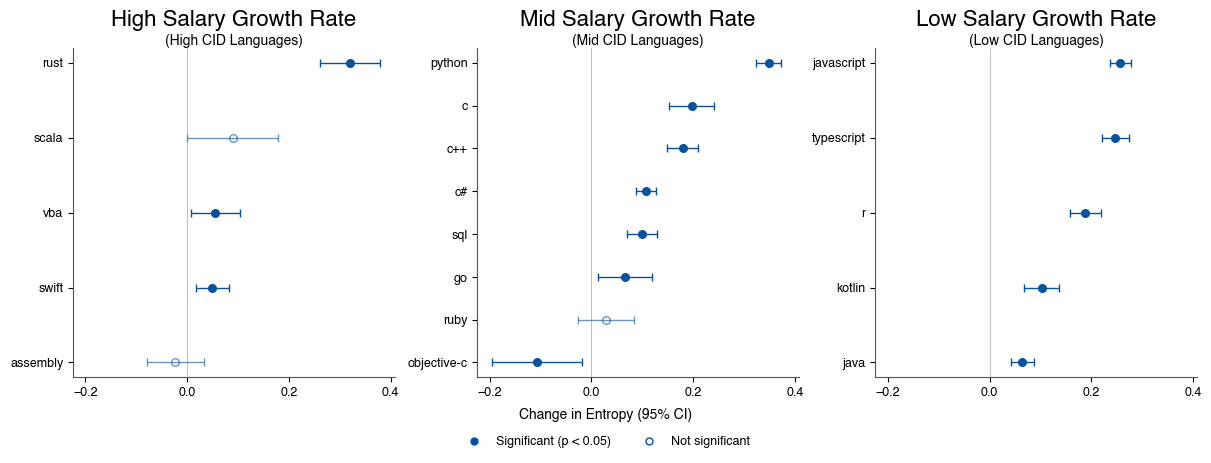

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
#  üé® Í≥µÌÜµ Ïª¨Îü¨ (Î™®Îì† Ìå®ÎÑê ÎèôÏùº)
# ---------------------------------------------------------
common_color = '#08519c'  # Ï§ëÍ∞ÑÌÜ§ ÌååÎûë (Ïù∏ÏáÑ Î∞è PDFÏö©ÏúºÎ°ú ÏïàÏ†ïÏ†Å)

fig, axs = plt.subplots(1, 3, figsize=(12, 4.2), sharex=True, constrained_layout=True)

for i, key in enumerate(summary_dict.keys()):
    s_df = summary_dict[key]
    languages = s_df['Language']
    diffs = s_df['Diff'].values
    ci_lows = diffs - s_df['CI_Low'].values
    ci_highs = s_df['CI_High'].values - diffs
    p_values = s_df['pvalue'].values

    # Ïú†ÏùòÏÑ± ÎßàÏä§ÌÅ¨
    sig_mask = p_values < 0.05
    

    # Í∞Å Ïñ∏Ïñ¥Î≥Ñ ÏóêÎü¨Î∞î Í∑∏Î¶¨Í∏∞
    for diff, ci_low, ci_high, lang, sig in zip(diffs, ci_lows, ci_highs, languages, sig_mask):
        axs[i].errorbar(
            diff, lang,
            xerr=[[ci_low], [ci_high]],
            fmt='o',
            mfc=common_color if sig else 'none',   # Ïú†Ïùò: Ï±ÑÏõÄ, ÎπÑÏú†Ïùò: Îπà Ïõê
            mec=common_color,
            mew=1.0,
            ecolor=common_color,
            elinewidth=1.0,
            capsize=3,
            markersize=5.5,
            alpha=1.0 if sig else 0.6
        )

    # ---------------------------------------------------------
    #  ÏÑúÎ∏åÌîåÎ°Ø Ïä§ÌÉÄÏùº
    # ---------------------------------------------------------
    axs[i].text(0.5, 1.05, f"{title_dict[key]}",
            ha='center', va='bottom', fontsize=16, fontweight='bold', transform=axs[i].transAxes)

    axs[i].text(0.5, 1.00, f"({key} CID Languages)",
            ha='center', va='bottom', fontsize=10, transform=axs[i].transAxes)   

    axs[i].axvline(0, color='gray', linestyle='-', linewidth=0.6, alpha=0.6)
    axs[i].tick_params(axis='x', labelsize=9)
    axs[i].tick_params(axis='y', labelsize=9)
    axs[i].grid(False)
    axs[i].set_xticks(np.arange(-0.2, 0.41, 0.2))


    # PNAS Ïä§ÌÉÄÏùº: ÏúÑ, Ïò§Î•∏Ï™Ω Ï∂ïÏÑ† Ï†úÍ±∞
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_linewidth(0.8)
    axs[i].spines['bottom'].set_linewidth(0.8)
    axs[i].spines['left'].set_color('#555555')
    axs[i].spines['bottom'].set_color('#555555')

# ---------------------------------------------------------
#  Í≥µÌÜµ ÎùºÎ≤® + Î≤îÎ°Ä + Ïó¨Î∞± Ï°∞Ï†ï
# ---------------------------------------------------------
fig.supxlabel('Change in Entropy (95% CI)', fontsize=10)
plt.subplots_adjust(wspace=0.03)

# Í≥µÌÜµ Î≤îÎ°Ä (ÌïòÎã® Ï§ëÏïô)
handles = [
    plt.Line2D([], [], marker='o', color='none',
               markerfacecolor=common_color, markeredgecolor=common_color,
               markersize=5, linestyle='None', label='Significant (p < 0.05)'),
    plt.Line2D([], [], marker='o', color='none',
               markerfacecolor='none', markeredgecolor=common_color,
               markersize=5, linestyle='None', label='Not significant')
]

fig.legend(
    handles=handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=2,
    frameon=False,
    fontsize=9
)
plt.savefig(f"{output_dir}C_Result_Fig4_3.png", dpi=300, bbox_inches='tight')
plt.show()
